# TP : Naïve Bayes et Ensemble appliqués au Titanic

## Récupération des données du cours ANN
Renvoie 2 Dataframe train (avec le champs Survived) et test (sans le champs Survived)

In [1]:
%run ./tp1_prepa_features.ipynb

<span style="color:blue;font-weight:bold">train :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<span style="color:blue;font-weight:bold">test :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<span style="color:blue;font-weight:bold">Effet de la classe</span>

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


<span style="color:blue;font-weight:bold">Effet du Genre</span>

      Sex  Survived
0  female  0.742038
1    male  0.188908


<span style="color:blue;font-weight:bold">Effet de la taille de la famille</span>

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<span style="color:blue;font-weight:bold">Effet de la présence de la famille</span>

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


<span style="color:blue;font-weight:bold">Effet du Port d'embarquement</span>

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


<span style="color:blue;font-weight:bold">Effet du Prix du Ticket</span>

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


<span style="color:blue;font-weight:bold">Effet de l'age</span>

     CategoricalAge  Survived
0    (0.34, 16.336]  0.513761
1  (16.336, 32.252]  0.352535
2  (32.252, 48.168]  0.380597
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909
Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


<span style="color:blue;font-weight:bold">Effet du titre</span>

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


<span style="color:blue;font-weight:bold">train mis en forme :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int32
IsAlone     891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.8 KB


<span style="color:blue;font-weight:bold">test mis en forme :</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null int32
IsAlone     418 non-null int64
Title       418 non-null int64
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


##  Préparation des données de Training

In [2]:
from sklearn.model_selection import train_test_split
#Séparation des valeurs de train et label (tous les exemples)
X_alltrain = train.values[:, 1:]
y_alltrain = train.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X_alltrain, y_alltrain, random_state=42)
print('%i X_train, %i X_test, %i y_train,%i y_test'%(
    X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]))
print('%i X_alltrain, %i y_alltrain'%(X_alltrain.shape[0], y_alltrain.shape[0]))
feature_names=train.columns.tolist()[1:]
target_names=["Disparu","Rescapé"]
print('features:',feature_names)
print('target:',target_names)

668 X_train, 223 X_test, 668 y_train,223 y_test
891 X_alltrain, 891 y_alltrain
features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone', 'Title']
target: ['Disparu', 'Rescapé']


## Fonction Utilitaires

In [3]:
# Fonctions permettant de générer le fichier d'envoi à Kaggle
#
#parametres: Classifiers; Données à calculer ; index)
def generer_resultats(clf,data=test.values,idx=finalfile_index):
    """
    Fonctions permettant de générer le fichier d'envoi à Kaggle.
    On passe un classifier sur lequel on refait le training avec toutes les données de training
    
    Parameters
    ----------
    Classifiers : Classifier utilisé pour la prédiction
    data : Données à calculer. par défaut, les valeurs du dataset "test"
    idx : Index des passagers testés. Stockés dans finalfile_index lors de la lecture des données
    """    
    print(clf.get_params())
    clf.fit(X_alltrain, y_alltrain)
    prediction=clf.predict(data)
    results=pd.DataFrame(prediction.astype(int), index = finalfile_index, columns=['Survived'])
    results.to_csv('resultats%s.csv'%clf.__class__.__name__)
    
#Fonction pour l'affichage 2 D des résultats    
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X,y, axes=[-0, 5, 0, 550], axis_name=['x1','x2'],alpha=0.5, contour=True):
    """
    Fonction pour l'affichage 2 D des résultats   
    
    Parameters
    ----------
    clf : Classifier à afficher
    X : features de Données a afficher
    y : labels de Données a afficher  
    axes : : Tailles des axes (valeur min/max)
    axis_name : Nom des axes sur le graphique
    alpha : Transparence des points
    contour : Afichage du contour
    """     
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo",label="Disparu", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ys", label="Rescapé",alpha=alpha)
    plt.axis(axes)
    plt.xlabel(axis_name[0], fontsize=18)
    plt.ylabel(axis_name[1]+ "  ",fontsize=18, rotation=0)    
    plt.legend(loc="lower right", fontsize=14)

In [12]:
train[['Title','Fare']]

,Title,Fare
0,1,7.2500
1,3,71.2833
2,2,7.9250
3,3,53.1000
4,1,8.0500
5,1,8.4583
6,1,51.8625
7,4,21.0750
8,3,11.1333
9,3,30.0708


## Exercice 1 : Naïve Bayes
En utilisant l'exemple du cours 2, contruisez et testez un modèle bayésien pour prévoir la survie. <br>
Essayez plusieurs valeurs pour max_depth <br>
Envoyer à Kaggle en utilisant la fonction generer_resultats

Niveau de précision gaussian : 77.13
{'priors': None}
Niveau de précision multinomial : 71.30
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


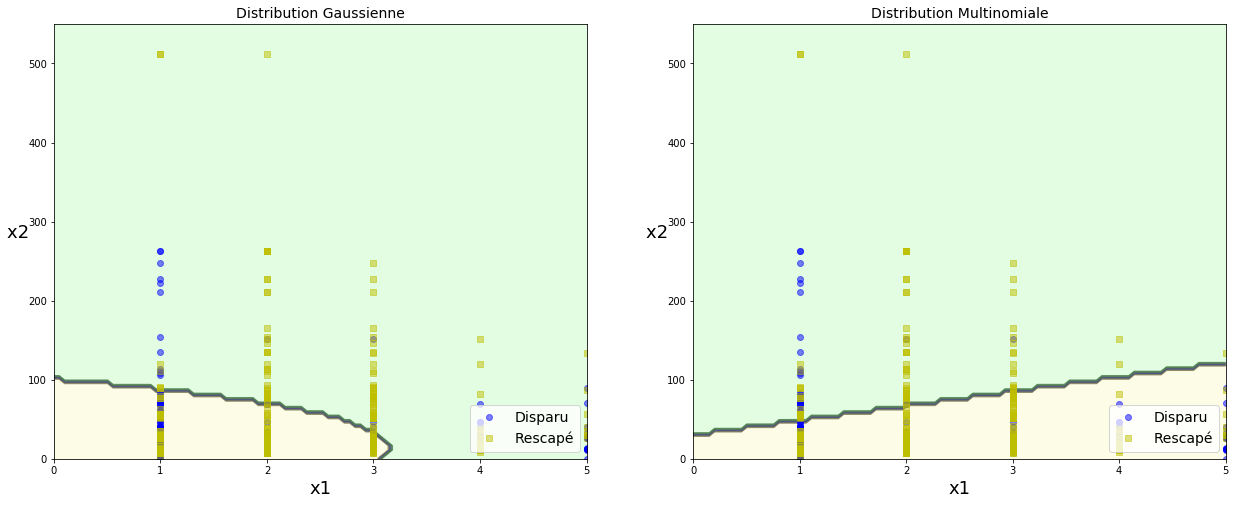

In [4]:
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred = gnb_clf.predict(X_test)    
print("Niveau de précision gaussian : %.2f"%(100*accuracy_score(y_test, y_pred)))
generer_resultats(gnb_clf)

mulnb_clf = MultinomialNB()
mulnb_clf.fit(X_train, y_train)
y_pred = mulnb_clf.predict(X_test)    
print("Niveau de précision multinomial : %.2f"%(100*accuracy_score(y_test, y_pred)))
generer_resultats(mulnb_clf)

# Au lieu d'être sur 7 colonnes, on garde uniquement 2 colonnes pour l'affichage 2D
gnb_clf_short = GaussianNB()
gnb_clf_short.fit(train[['Title','Fare']].values, y_alltrain)
mulnb_clf_short = MultinomialNB()
mulnb_clf_short.fit(train[['Title','Fare']].values, y_alltrain)

#Affichage et comparaison
plt.figure(figsize=(21,8))
plt.subplot(121)
plot_decision_boundary(gnb_clf_short, train[['Title','Fare']].values, y_alltrain)
plt.title("Distribution Gaussienne", fontsize=14)
plt.subplot(122)
plot_decision_boundary(mulnb_clf_short, train[['Title','Fare']].values, y_alltrain)
plt.title("Distribution Multinomiale", fontsize=14)
plt.show()

## Exercice 2 : Modèles d'ensembles
En utilisant l'exemple 3 du cours 1 ainsi que les résultat du TP1, créer un modèle d'ensemble en testant soft et hard voting.

In [17]:
# Graphes
%matplotlib inline
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Eviter les warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
"""
plt.scatter(X_train[:,0],X_train[:,1], c = y_alltrain, cmap='plasma');
plt.title('noise=1')
plt.scatter(X_train ,X_train[:,1], c = y_alltrain, cmap='plasma');
plt.title('noise=5')
plt.show()
plt.scatter(X_train[:,0],X_train[:,1], c = y_alltrain, cmap='plasma');
plt.title('no noise')
plt.show()
"""
tree_clf_short = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_short.fit(train[['Title','Fare']].values, y_alltrain)

rnd_clf_short = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf_short.fit(train[['Title','Fare']].values, y_alltrain)

voting_clf = VotingClassifier(estimators=[('lr', tree_clf_short),
                                          ('rf', rnd_clf_short), 
                                          ('by', gnb_clf_short)],
                              voting='hard')

dict_scores={}
for clf in (tree_clf_short, rnd_clf_short, gnb_clf_short, voting_clf):
    clf.fit(train[['Title','Fare']].values, y_alltrain)
    y_pred = clf.predict(train[['Title','Fare']].values)    
    dict_scores[clf.__class__.__name__]=accuracy_score(y_alltrain, y_pred)
    generer_resultats(clf)
    

voting_soft_clf = VotingClassifier(estimators=[('lr', tree_clf_short),
                                          ('rf', rnd_clf_short),
                                          ('by', gnb_clf_short)],
                              voting='soft')
voting_soft_clf.fit(train[['Title','Fare']].values, y_alltrain)
y_pred = voting_soft_clf.predict(train[['Title','Fare']].values)
dict_scores['VotingClassifier Soft']=accuracy_score(y_alltrain, y_pred)
dict_scores
generer_resultats(voting_soft_clf)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 42, 'splitter': 'best'}
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'priors': None}
{'estimators': [('lr', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0

## Exercice 3 Optionnel : Stacking
Remplacer le voting par un modèle logistique (voir exemple 2 cours 1)
Vous pouvez utiliser la cross validation

## Exercice 4 Optionnel : Ajouter les prédictions tensorflow du cours Neural Network au modèle d'ensemble